<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-1/blob/main/VptreesPRUEBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/chfwr4x475y3p1v/noticiasFotos.zip?dl=0 -O 2.zip
!unzip 2.zip

In [12]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
os.mkdir('3')


In [ ]:
#trabajaremos solo con las primeras mil imágenes

In [73]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()
      
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
%matplotlib inline 

Para facilitar la búsqueda con vptrees necesitamos los hashes de una imagen , para ello primero las pasamos a escala de grises y escalamos

In [74]:
# import the necessary packages
from imutils import paths
import argparse
import time
import sys
import cv2
import os

In [75]:
def dhash(image, hashSize=8):
	# convert the image to grayscale
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	
	# resize the input image, adding a single column (width) so we
	# can compute the horizontal gradient
	resized = cv2.resize(gray, (hashSize + 1, hashSize))

	# compute the (relative) horizontal gradient between adjacent
	# column pixels
	diff = resized[:, 1:] > resized[:, :-1]

	# convert the difference image to a hash
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [76]:
print('Procesando Hashes')
DIR='3'

# ListaHashes=[]
# for name in os.listdir('3'):
#   gris = cv2.cvtColor(cv2.imread(f'{DIR}/{name}'), cv2.COLOR_BGR2GRAY) 
#   ListaHashes.append(dhash(gris))

Procesando Hashes


error: ignored

Importamos los paquetes necesarios para el funcionamiento de la búsqueda por vptrees

In [77]:
!pip install opencv-contrib-python
!pip install vptree
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/image-hashing-search-engine/hashing-search-engine.zip
!unzip -qq hashing-search-engine.zip
%cd hashing-search-engine
# import the necessary packages
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import pickle
import vptree
import time
import cv2
import os

--2021-05-25 10:36:42--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/image-hashing-search-engine/hashing-search-engine.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.252.200
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.252.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113505 (111K) [application/zip]
Saving to: ‘hashing-search-engine.zip’

hashing-search-engi 100%[===================>] 110.84K   465KB/s    in 0.2s    

2021-05-25 10:36:43 (465 KB/s) - ‘hashing-search-engine.zip’ saved [113505/113505]

/content/hashing-search-engine/hashing-search-engine


In [ ]:
!wget https://pis-datasets.s3.us-east-2.amazonaws.com/101_ObjectCategories.tar.gz
!tar xvf 101_ObjectCategories.tar.gz

In [78]:
#Mostrar Una imagen
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()
 

In [79]:
def dhash(image, hashSize=8):
	# convert the image to grayscale
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	
	# resize the input image, adding a single column (width) so we
	# can compute the horizontal gradient
	resized = cv2.resize(gray, (hashSize + 1, hashSize))

	# compute the (relative) horizontal gradient between adjacent
	# column pixels
	diff = resized[:, 1:] > resized[:, :-1]

	# convert the difference image to a hash
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])
def convert_hash(h):
	# convert the hash to NumPy's 64-bit float and then back to
	# Python's built in int
	return int(np.array(h, dtype="float64"))
def hamming(a, b):
	# compute and return the Hamming distance between the integers
	return bin(int(a) ^ int(b)).count("1")

In [84]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--images", required=True, type=str,
# 	help="path to input directory of images")
# ap.add_argument("-t", "--tree", required=True, type=str,
# 	help="path to output VP-Tree")
# ap.add_argument("-a", "--hashes", required=True, type=str,
# 	help="path to output hashes dictionary")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "images": "3",
    "tree": "vptree.pickle",
    "hashes": "hashes.pickle"
}

In [90]:
# grab the paths to the input images and initialize the dictionary
# of hashes
imagePaths = list(paths.list_images(args["images"]))
hashes = {}

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# load the input image
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	image = cv2.imread(imagePath)

	# compute the hash for the image and convert it
	h = dhash(image)
	h = convert_hash(h)

	# update the hashes dictionary
	l = hashes.get(h, [])
	l.append(imagePath)
	hashes[h] = l

In [87]:
# build the VP-Tree
print("[INFO] building VP-Tree...")
points = list(hashes.keys())
tree = vptree.VPTree(points, hamming)

[INFO] building VP-Tree...


ValueError: ignored

In [68]:
# serialize the VP-Tree to disk
print("[INFO] serializing VP-Tree...")
f = open(args["tree"], "wb")
f.write(pickle.dumps(tree))
f.close()

# serialize the hashes to dictionary
print("[INFO] serializing hashes...")
f = open(args["hashes"], "wb")
f.write(pickle.dumps(hashes))
f.close()

[INFO] serializing VP-Tree...
[INFO] serializing hashes...


In [69]:
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-t", "--tree", required=True, type=str,
# 	help="path to pre-constructed VP-Tree")
# ap.add_argument("-a", "--hashes", required=True, type=str,
# 	help="path to hashes dictionary")
# ap.add_argument("-q", "--query", required=True, type=str,
# 	help="path to input query image")
# ap.add_argument("-d", "--distance", type=int, default=10,
# 	help="maximum hamming distance")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "tree": "vptree.pickle",
    "hashes": "hashes.pickle",
    "query": "queries/2.jfif",
    "distance": 10
}

[INFO] loading VP-Tree and hashes...


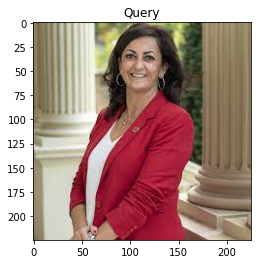

In [70]:
# load the VP-Tree and hashes dictionary
print("[INFO] loading VP-Tree and hashes...")
tree = pickle.loads(open(args["tree"], "rb").read())
hashes = pickle.loads(open(args["hashes"], "rb").read())

# load the input query image
image = cv2.imread(args["query"])
plt_imshow("Query", image)

# compute the hash for the query image, then convert it
queryHash = dhash(image)
queryHash = convert_hash(queryHash)

In [71]:
# perform the search
print("[INFO] performing search...")
start = time.time()
results = tree.get_all_in_range(queryHash, args["distance"])
results = sorted(results)
end = time.time()
print("[INFO] search took {} seconds".format(end - start))

[INFO] performing search...
[INFO] search took 0.00444340705871582 seconds


In [72]:
# loop over the results
for (d, h) in results:
	# grab all image paths in our dataset with the same hash
	resultPaths = hashes.get(h, [])
	print("[INFO] {} total image(s) with d: {}, h: {}".format(
		len(resultPaths), d, h))

	# loop over the result paths
	for resultPath in resultPaths:
		# load the result image and display it to our screen
		result = cv2.imread(resultPath)
		plt_imshow("Result", result)